In [19]:
import matplotlib.pyplot as plt
import numpy as np
import frequency_filter as ff

from skimage import io
from skimage.filters import threshold_otsu
from skimage.util import img_as_float
from skimage.exposure import adjust_sigmoid

## Filters to remove background and improve contrast

[Otsu's method reference](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_thresholding.html)

In [127]:
# original image
im_ch3 = img_as_float(io.imread('..\C3-NTG-CFbs_NTG5ECM_1mMRGD_20x_003.tif'))

# Otsu
thresh = threshold_otsu(im_ch3[12], nbins=256)
im_ch3_binary = im_ch3[12] > thresh

# contrast adjustment
im_ch3_sig = adjust_sigmoid(im_ch3[12], cutoff=0, gain=100, inv=False)

# Otsu + contrast adjustment
thresh_sig = threshold_otsu(im_ch3_sig, nbins=256)
im_ch3_sig_binary = im_ch3_sig > thresh_sig

# contrast + high pass filter
im_ch3_hi = ff.frequency_filter(im_ch3_sig, 256, 85, passtype='high')

# contrast + low pass filter
im_ch3_lo = ff.frequency_filter(im_ch3_sig, 500, 70, passtype='low')

# contrast + low pass + binary 
thresh_lo = threshold_otsu(im_ch3_lo, nbins=256)
im_ch3_lo_binary = im_ch3_lo > thresh_lo

# Contrast + Steve's way
im_shift = im_ch3_sig - np.min(im_ch3_sig)
im_norm = im_shift/np.max(im_ch3_sig)
im_thresh = im_norm > 0.1

# contrast + binary + low pass
im_ch3_lo_2 = ff.frequency_filter(im_ch3_sig_binary, 500, 80, passtype='low')

Text(0.5, 1.0, 'Contrast + Binary + Low Pass')

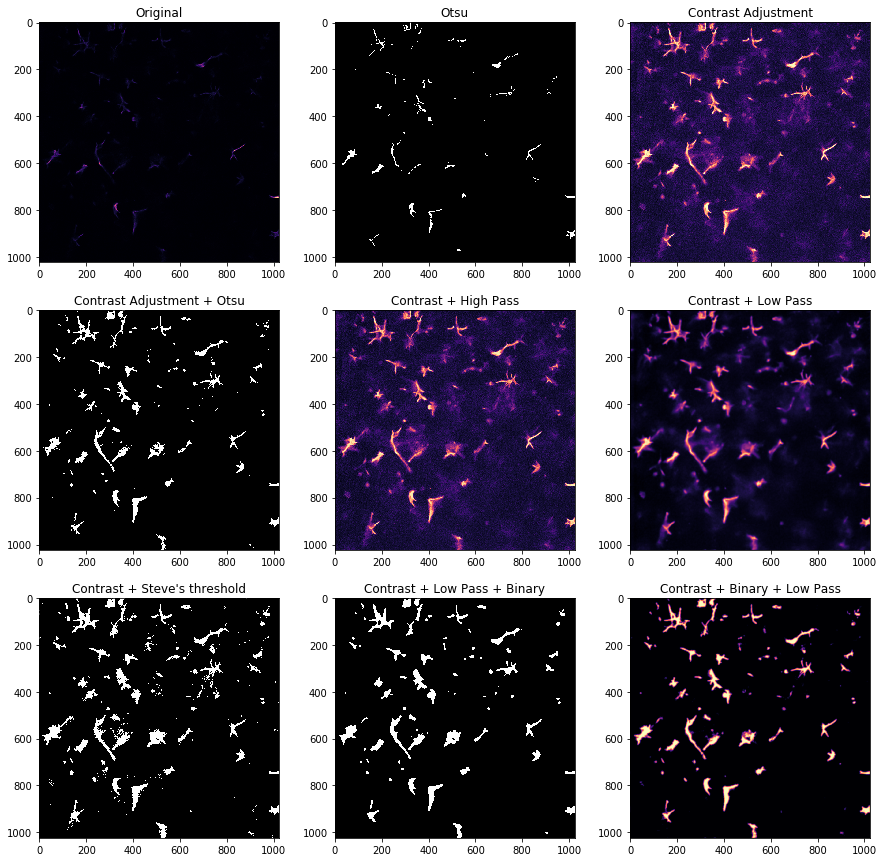

In [131]:
# plotting
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(15, 15))

ax[0,0].imshow(im_ch3[12], cmap='magma')
ax[0,0].set_title('Original')

ax[0,1].imshow(im_ch3_binary, cmap='binary_r')
ax[0,1].set_title('Otsu')

ax[0,2].imshow(im_ch3_sig, cmap='magma')
ax[0,2].set_title('Contrast Adjustment')

ax[1,0].imshow(im_ch3_sig_binary, cmap='binary_r')
ax[1,0].set_title('Contrast Adjustment + Otsu')

ax[1,1].imshow(im_ch3_hi, cmap='magma')
ax[1,1].set_title('Contrast + High Pass')

ax[1,2].imshow(im_ch3_lo, cmap='magma')
ax[1,2].set_title('Contrast + Low Pass')

ax[2,0].imshow(im_thresh, cmap='binary_r')
ax[2,0].set_title("Contrast + Steve's threshold")

ax[2,1].imshow(im_ch3_lo_binary, cmap='binary_r')
ax[2,1].set_title('Contrast + Low Pass + Binary')

ax[2,2].imshow(im_ch3_lo_2, cmap='magma')
ax[2,2].set_title('Contrast + Binary + Low Pass')

## Creating a function

In [132]:
def phalloidin_488_binary(im, mu=500, sigma=70, cutoff=0, gain=100):
    """
    This function binarizes a phalloidin 488 fluorescence microscopy channel. 
    
    Paramters
    ---------
    im : (N, M) ndarray
        Grayscale input image.
    cutoff : float, optional
        Cutoff of the sigmoid function that shifts the characteristic curve
        in horizontal direction. Default value is 0.
    gain : float, optional
        The constant multiplier in exponential's power of sigmoid function.
        Default value is 100.
    mu : float, optional
        Average for input in low pass filter. Default value is 500.
    sigma : float, optional
        Standard deviation for input in low pass filter. Default value is 70.
    
    Returns
    -------
    out : ndarray
        Contrast adjusted, low pass filtered, binarized output image.
    
    Examples
    --------
    >>> image = plt.imread('..\C3-NTG-CFbs_NTG5ECM_1mMRGD_20x_003.tif')
    >>> binary = phalloidin_488_binary(image, mu=500, sigma=70, cutoff=0, gain=100)
    
    """
    from skimage.exposure import adjust_sigmoid
    from skimage.filters import threshold_otsu
    
    import frequency_filter as ff
    
    # contrast adjustment
    im_con = adjust_sigmoid(im, cutoff=0, gain=100, inv=False)
    
    # contrast + low pass filter
    im_con_lo = ff.frequency_filter(im_con, mu, sigma, passtype='low')
    
    # contrast + low pass + binary 
    thresh_lo = threshold_otsu(im_con_lo, nbins=256)
    im_con_lo_bin = im_con_lo > thresh_lo
    
    return im_con_lo_bin

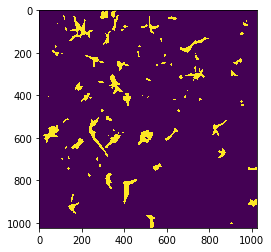

In [134]:
test = phalloidin_488_binary(im_ch3[12], mu=500, sigma=70, cutoff=0, gain=100)
plt.imshow(test)